# Principal Components Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
%matplotlib inline  


In [2]:
#Load data, subtract mean, etc
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
X,y     = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
sc      = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std  = sc.fit_transform(X_test)
print(X_train_std.shape)
print(X_test_std.shape)

(124, 13)
(54, 13)


In [3]:
#compute covariance, eigenvals and eigenvecs
cov_mat = np.cov(X_train_std.T)
print(cov_mat)

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)

[[ 1.00813008  0.04741475  0.16719927 -0.38978324  0.406653    0.2835148
   0.24367503 -0.21267051  0.18348069  0.56299792 -0.11827796  0.06757603
   0.68388186]
 [ 0.04741475  1.00813008  0.14278652  0.2941777   0.03642222 -0.30619159
  -0.3513925   0.28174739 -0.11194399  0.2067209  -0.56682689 -0.33391576
  -0.18072901]
 [ 0.16719927  0.14278652  1.00813008  0.44642665  0.40495332  0.09999566
   0.1295656   0.28785615  0.04028363  0.18472956 -0.07227455  0.04149829
   0.20752593]
 [-0.38978324  0.2941777   0.44642665  1.00813008 -0.13786502 -0.34238176
  -0.33290217  0.43880959 -0.20131467 -0.04597549 -0.24012244 -0.23464877
  -0.48428999]
 [ 0.406653    0.03642222  0.40495332 -0.13786502  1.00813008  0.23856245
   0.29412627 -0.19699665  0.12179359  0.32305371 -0.09164062  0.07680384
   0.43753898]
 [ 0.2835148  -0.30619159  0.09999566 -0.34238176  0.23856245  1.00813008
   0.8692212  -0.40514556  0.68264039 -0.02173419  0.36585217  0.69119557
   0.4534571 ]
 [ 0.24367503 -0.351392

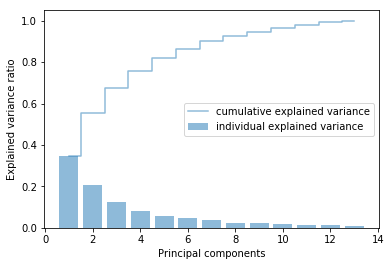

In [4]:
#compute explained variance and plot
tot         = sum(eigen_vals)
var_exp     = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')	
plt.step(range(1,14), cum_var_exp, alpha=0.5, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

Matrix W:
 [[-0.19304994 -0.44257488]
 [ 0.21681592 -0.24240033]
 [-0.00791585 -0.25644027]
 [ 0.25913707  0.03245749]
 [-0.15758078 -0.36163092]
 [-0.40436719  0.00212157]
 [-0.43101568  0.04110109]
 [ 0.3003935  -0.04385211]
 [-0.32146557 -0.01758488]
 [ 0.02268415 -0.51850872]
 [-0.2387487   0.3552134 ]
 [-0.36497969  0.20665006]
 [-0.30014464 -0.32575972]]
[[  4.56984144e+00  -4.24791244e-16]
 [ -4.24791244e-16   2.68041910e+00]]
(124, 2)


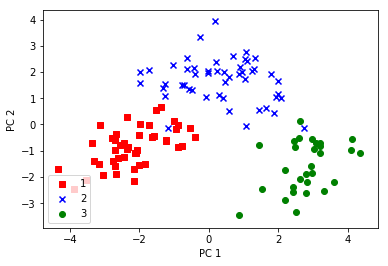

In [5]:
#perform dimensionality reduction
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

X_train_pca = X_train_std.dot(w)
cov_mat = np.cov(X_train_pca.T)
print(cov_mat)
print(X_train_pca.shape)
colors = ['r','b','g']
markers = ['s', 'x', 'o']
for l,c,m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l,0],X_train_pca[y_train==l,1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

[[ 5.11336225 -0.63404041]
 [-0.63404041  2.25755415]]
[[-2.09258145  1.7658037 ]
 [ 0.37758436  1.23403509]
 [ 1.34089842 -1.47955384]
 [ 1.7585297  -1.18844057]
 [ 1.61327919  1.5972    ]
 [-2.67448234  0.65159454]
 [-2.07137939  1.77176757]
 [-1.88719584  1.09518553]
 [ 3.1247841  -1.06282764]
 [-4.0974471  -0.76905904]
 [ 1.7875072  -2.59308821]
 [ 3.02651564 -1.48911449]
 [-0.42737172  1.49905993]
 [-2.6975273  -0.28782769]
 [-2.84238331  0.46602003]
 [ 1.81496479 -2.61176576]
 [-1.76009337 -1.54074429]
 [-0.94546396  2.64260865]
 [ 0.88683796  2.01407959]
 [-1.23576433  1.16570724]
 [-2.8859242  -1.1458805 ]
 [ 0.09925086  2.35296568]
 [ 1.48188735  0.8660908 ]
 [ 2.06988944  1.0715369 ]
 [ 0.47863394  2.8472426 ]
 [ 1.59625039 -2.0806718 ]
 [ 1.47943989  1.80725127]
 [-3.08168046 -0.56009542]
 [ 2.60014643 -0.51218156]
 [ 2.26225678 -0.55296447]
 [-2.78853808  0.29213926]
 [-2.4298662  -1.11809168]
 [-1.51794552  1.01772558]
 [ 2.17628901 -0.77513216]
 [ 0.34005599  2.3361159 ]


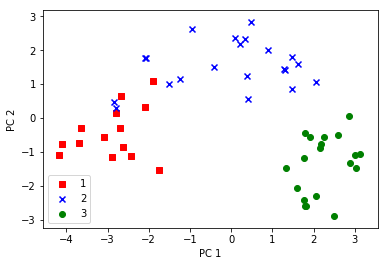

In [6]:
X_test_pca = X_test_std.dot(w)
cov_mat = np.cov(X_test_pca.T)
print(cov_mat)
print(X_test_pca)
print(y_test)
for l,c,m in zip(np.unique(y_test), colors, markers):
    plt.scatter(X_test_pca[y_test==l,0],X_test_pca[y_test==l,1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

downloading Olivetti faces from http://cs.nyu.edu/~roweis/data/olivettifaces.mat to /Users/hudanyun.sheng/scikit_learn_data
Dataset consists of 400 faces


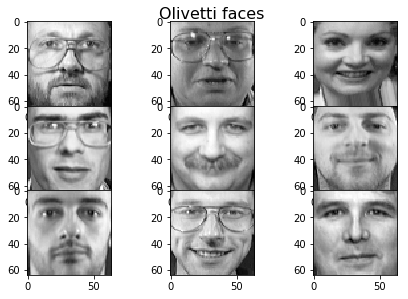

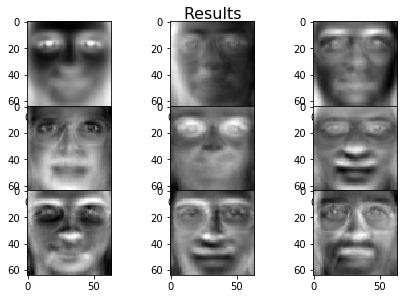

In [11]:
#Eigenfaces
#Part of example from: http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html

from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA

n_row, n_col = 3, 3
n_components = n_row * n_col
image_shape = (64, 64)

# Load faces 
dataset = fetch_olivetti_faces(shuffle=True)
faces = dataset.data
n_samples, n_features = faces.shape

print("Dataset consists of %d faces" % n_samples)

#Define function to plot imagery
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure()
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        comp = comp.reshape((64,64))
        plt.imshow(comp,cmap='gray')
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

scikit_pca = PCA(n_components = n_components, whiten=True)
X_spca = scikit_pca.fit_transform(faces.T)

plot_gallery("Olivetti faces", faces[0:n_components,:])
plot_gallery('Results', X_spca.T)


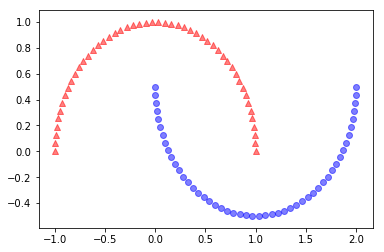

In [12]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 100, random_state = 123)
plt.scatter(X[y==0,0], X[y==0, 1], color='red', marker = '^', alpha=0.5)
plt.scatter(X[y==1,0], X[y==1, 1], color='blue', marker = 'o', alpha=0.5)
plt.show()

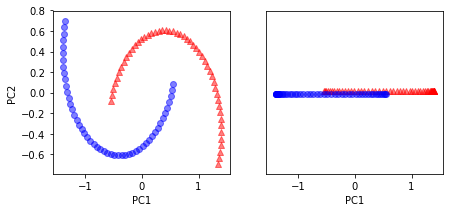

In [13]:
# Apply standard PCA
scikit_pca = PCA(n_components = 2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
ax[0].scatter(X_spca[y==0,0], X_spca[y==0,1], color='red', marker = '^', alpha=0.5)
ax[0].scatter(X_spca[y==1,0], X_spca[y==1,1], color='blue', marker = 'o', alpha=0.5)
ax[1].scatter(X_spca[y==0,0], np.zeros((50,1))+0.02, color='red', marker = '^', alpha=0.5)
ax[1].scatter(X_spca[y==1,0], np.zeros((50,1))-0.02, color='blue', marker = 'o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()